In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [14]:
#print (os.getcwd())

In [15]:
# #으로 시작하는 첫 번째 줄은 주석으로 판단하고 읽지 않음
xy = np.loadtxt('localhost_8080_priceMatrix.csv', unpack=True, delimiter=",",dtype='float32')
date_data = xy[0]
x_data = xy[1:-1]
y_data = xy[-1]

FileNotFoundError: [Errno 2] No such file or directory: 'flight.txt'

In [16]:
# 5행 4열로 구성된 파일이지만, numpy에서 읽어오면 4행 5열이 된다.
# 그래야 열 단위로 행렬 연산을 수행할 수 있다.
print(type(xy))         # <class 'numpy.ndarray'>
print(xy.shape)         # (4, 5)
print(date_data)
print(x_data)
print(len(x_data))      # 3
print(y_data)

<class 'numpy.ndarray'>
(12, 12)
11


In [17]:
with tf.device("/gpu:0"):
    # W는 1x(x_data 크기) 매트릭스
    rng = np.random
    date = tf.Variable(tf.log(rng.randn()))
    #date_log = tf.log(date)
    #date_mul = tf.Variable(rng.randn(), name="date_mul")
    #date_val = tf.scalar_mul(date,date_mul)
    W = tf.Variable(tf.random_uniform([1, len(x_data)], -1, 1))
    b = tf.Variable(rng.randn(), name="bias")
    #hypothesis = tf.add(tf.add(tf.matmul(W, x_data), b),date_val)
    hypothesis = tf.add(tf.matmul(W, x_data), b)
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    rate = tf.Variable(0.0001)  # learning rate, alpha
    optimizer = tf.train.GradientDescentOptimizer(rate)
    train = optimizer.minimize(cost)  # goal is minimize cost
    #init = 

In [18]:
sess =  tf.Session(config=tf.ConfigProto(allow_soft_placement=False, log_device_placement=True))
sess.run(tf.global_variables_initializer() )
for step in range(200001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train])
    if step % 20000 == 0:
        print(step, sess.run(date), np.sqrt(sess.run(cost)) , sess.run(W),'\n\n\n\n\n')
        plt.plot(step, np.sqrt(sess.run(cost)),'b.')

0 52.8433 253576.0 [[ 525.28393555  190.16395569   18.64753532   31.19484329   16.0293808
     7.70608044    7.8553381     4.60718584    5.27679825    4.16455936
     3.91625214]] 





500 8494.46 90862.9 [[  7028.24707031  31622.5859375    3449.93896484   5041.51269531
     527.30206299   1732.09692383   2551.73266602   1954.95422363
     247.0640564     376.8157959    1101.20129395]] 







1000 12568.2 52839.0 [[  3568.39672852  46564.42578125   5293.81103516   7271.33447266
     591.5291748    2547.04418945   3754.15625      3179.85449219
     302.80004883    597.34454346   1592.13708496]] 





1500 14752.0 36075.9 [[  1765.27429199  54337.640625     6446.80810547   8302.16015625
     621.11914062   2933.04272461   4269.18505859   4034.43066406
     314.42053223    793.49053955   1782.99853516]] 







2000 15950.2 29816.9 [[   825.00067139  58377.5703125    7233.01513672   8714.15136719
     631.39849854   3095.38085938   4427.04248047   4695.19873047
     304.21072388    977.27416992   1816.37011719]] 





2500 16633.7 27736.4 [[   334.12197876  60473.3671875    7821.53808594   8809.17089844
     630.42572021   3141.00512695   4399.71044922   5254.04443359
     283.72479248   1154.91027832   1766.58081055]] 







3000 17047.9 27003.9 [[    77.3037262   61556.828125     8300.76855469   8744.15722656
     622.47247314   3125.63232422   4276.77490234   5758.79931641
     258.93075562   1329.59155273   1672.40795898]] 





3500 17320.6 26664.0 [[ -5.75850182e+01   6.21131602e+04   8.71705078e+03   8.60059863e+03
    6.09834290e+02   3.07830493e+03   4.10489893e+03   6.23434766e+03
    2.32889954e+02   1.50294226e+03   1.55411353e+03]] 







4000 17518.5 26436.4 [[  -128.94824219  62395.07421875   9094.81347656   8420.70605469
     593.7734375    3014.17431641   3908.39453125   6693.62255859
     207.15194702   1675.76794434   1422.31188965]] 





4500 17676.3 26242.8 [[  -167.19784546  62534.1484375    9447.04492188   8226.23632812
     575.01025391   2941.15161133   3699.92797852   7143.33935547
     182.4818573    1848.44567871   1282.59118652]] 







5000 17812.1 26061.5 [[  -188.1819458   62598.9375       9780.78417969   8028.29101562
     553.98046875   2863.37890625   3486.10668945   7586.97509766
     159.23770142   2021.15539551   1137.91638184]] 





5500 17935.4 25886.2 [[  -200.15231323  62625.1328125   10099.93457031   7832.48828125
     530.96673584   2783.03417969   3270.38256836   8026.31542969
     137.5677948    2193.95214844    989.88775635]] 







6000 18051.3 25715.3 [[  -207.40080261  62631.28515625  10406.76757812   7641.53710938
     506.17108154   2701.26953125   3054.55151367   8462.27832031
     117.51282501   2366.80371094    839.38806152]] 





6500 18162.3 25548.0 [[  -212.17337036  62627.08203125  10702.69824219   7456.66894531
     479.74865723   2618.70385742   2839.54101562   8895.328125
      99.05953217   2539.75463867    686.92663574]] 







7000 18270.0 25383.9 [[  -215.63331604  62617.5546875   10988.66015625   7278.36035156
     451.8291626    2535.67773438   2625.85644531   9325.69433594
      82.16814423   2712.72827148    532.81488037]] 





7500 18375.0 25223.0 [[  -218.38645935  62605.296875    11265.36230469   7106.68945312
     422.52526855   2452.37182617   2413.75634766   9753.48144531
      66.78656006   2885.59326172    377.25930786]] 







8000 18477.9 25064.9 [[ -2.20730728e+02   6.25916250e+04   1.15333564e+04   6.94156592e+03
    3.91940491e+02   2.36892236e+03   2.20338989e+03   1.01787168e+04
    5.28588905e+01   3.05839697e+03   2.20413620e+02]] 





8500 18578.8 24909.5 [[ -2.22987015e+02   6.25779531e+04   1.17930928e+04   6.78272949e+03
    3.60161438e+02   2.28540259e+03   1.99480273e+03   1.06014160e+04
    4.03236160e+01   3.23106274e+03   6.23837433e+01]] 







9000 18677.9 24756.7 [[ -2.25021698e+02   6.25635156e+04   1.20449834e+04   6.62993115e+03
    3.27281250e+02   2.20178442e+03   1.78802844e+03   1.10215742e+04
    2.91245937e+01   3.40354126e+03  -9.67335815e+01]] 





9500 18775.3 24606.4 [[ -2.26951569e+02   6.25489414e+04   1.22894385e+04   6.48295361e+03
    2.93382782e+02   2.11822119e+03   1.58311304e+03   1.14391953e+04
    1.92081413e+01   3.57579614e+03  -2.56839142e+02]] 







10000 18871.3 24458.4 [[ -2.28845139e+02   6.25344492e+04   1.25268027e+04   6.34152051e+03
    2.58541321e+02   2.03472510e+03   1.38005872e+03   1.18542588e+04
    1.05199928e+01   3.74778516e+03  -4.17856140e+02]] 





10500 18965.7 24312.7 [[ -2.30703415e+02   6.25201094e+04   1.27574102e+04   6.20537012e+03
    2.22829712e+02   1.95128137e+03   1.17886572e+03   1.22667383e+04
    3.00870132e+00   3.91946338e+03  -5.79711914e+02]] 







11000 19058.8 24169.0 [[ -2.32528305e+02   6.25058438e+04   1.29815645e+04   6.07424854e+03
    1.86316650e+02   1.86793604e+03   9.79531799e+02   1.26766396e+04
   -3.37467980e+00   4.09079980e+03  -7.42338013e+02]] 





11500 19150.4 24027.4 [[ -2.34321106e+02   6.24917070e+04   1.31995723e+04   5.94791650e+03
    1.49067261e+02   1.78470740e+03   7.82054688e+02   1.30839512e+04
   -8.67674255e+00   4.26177100e+03  -9.05669006e+02]] 







12000 19240.8 23887.8 [[ -2.36083084e+02   6.24776523e+04   1.34117070e+04   5.82614746e+03
    1.11142891e+02   1.70162402e+03   5.86430420e+02   1.34886348e+04
   -1.29419260e+01   4.43231201e+03  -1.06964172e+03]] 





12500 19330.0 23750.0 [[ -2.37815567e+02   6.24636758e+04   1.36182393e+04   5.70872559e+03
    7.26018906e+01   1.61869788e+03   3.92654175e+02   1.38907129e+04
   -1.62124577e+01   4.60241260e+03  -1.23419861e+03]] 







13000 19417.9 23614.0 [[ -2.39519501e+02   6.24497891e+04   1.38194229e+04   5.59544629e+03
    3.34989662e+01   1.53595337e+03   2.00720322e+02   1.42901709e+04
   -1.85286217e+01   4.77204688e+03  -1.39928284e+03]] 







13500 19504.6 23479.7 [[ -2.41195740e+02   6.24360039e+04   1.40155039e+04   5.48611670e+03
   -6.11383438e+00   1.45340662e+03   1.06224384e+01   1.46869883e+04
   -1.99288406e+01   4.94118701e+03  -1.56484058e+03]] 







14000 19590.2 23347.1 [[ -2.42843292e+02   6.24222695e+04   1.42066992e+04   5.38055078e+03
   -4.61874390e+01   1.37107739e+03  -1.77646561e+02   1.50811865e+04
   -2.04496422e+01   5.10981006e+03  -1.73081958e+03]] 





14500 19674.7 23216.2 [[ -2.44463440e+02   6.24085938e+04   1.43932432e+04   5.27857324e+03
   -8.66754227e+01   1.28898035e+03  -3.64093872e+02   1.54727393e+04
   -2.01258011e+01   5.27787305e+03  -1.89717273e+03]] 







15000 19758.3 23086.8 [[ -2.46047287e+02   6.23949219e+04   1.45753369e+04   5.18002734e+03
   -1.27533524e+02   1.20713269e+03  -5.48725586e+02   1.58616621e+04
   -1.89902534e+01   5.44537305e+03  -2.06385352e+03]] 





15500 19840.8 22958.9 [[ -2.47596603e+02   6.23812500e+04   1.47531729e+04   5.08475488e+03
   -1.68720032e+02   1.12555042e+03  -7.31547974e+02   1.62479580e+04
   -1.70743713e+01   5.61229932e+03  -2.23081519e+03]] 







16000 19922.5 22832.4 [[ -2.49113571e+02   6.23675781e+04   1.49269570e+04   4.99261279e+03
   -2.10195770e+02   1.04425012e+03  -9.12567566e+02   1.66316484e+04
   -1.44080563e+01   5.77859912e+03  -2.39800586e+03]] 





16500 20003.3 22707.4 [[ -2.50601379e+02   6.23539062e+04   1.50968613e+04   4.90346484e+03
   -2.51923599e+02   9.63244629e+02  -1.09179236e+03   1.70126445e+04
   -1.10198746e+01   5.94429102e+03  -2.56540820e+03]] 







17000 20083.2 22583.8 [[ -2.52062103e+02   6.23402344e+04   1.52630596e+04   4.81717773e+03
   -2.93868835e+02   8.82548401e+02  -1.26923145e+03   1.73910547e+04
   -6.93709612e+00   6.10933545e+03  -2.73295825e+03]] 





17500 20162.3 22461.5 [[ -2.53491440e+02   6.23265625e+04   1.54257129e+04   4.73362744e+03
   -3.35997986e+02   8.02172852e+02  -1.44489331e+03   1.77668828e+04
   -2.18564320e+00   6.27372266e+03  -2.90063062e+03]] 







18000 20240.6 22340.6 [[ -2.54893112e+02   6.23128906e+04   1.55849658e+04   4.65269287e+03
   -3.78280518e+02   7.22129700e+02  -1.61878870e+03   1.81400293e+04
    3.20961237e+00   6.43744629e+03  -3.06835522e+03]] 





18500 20318.1 22221.0 [[ -2.56274445e+02   6.22992188e+04   1.57409775e+04   4.57426025e+03
   -4.20687134e+02   6.42429016e+02  -1.79092847e+03   1.85106016e+04
    9.22488880e+00   6.60049072e+03  -3.23620166e+03]] 







19000 20395.0 22102.6 [[ -2.57639008e+02   6.22855469e+04   1.58938760e+04   4.49822070e+03
   -4.63190643e+02   5.63080750e+02  -1.96132422e+03   1.88786172e+04
    1.58375473e+01   6.76283838e+03  -3.40404834e+03]] 







19500 20471.2 21985.4 [[ -2.58975800e+02   6.22718750e+04   1.60438018e+04   4.42447217e+03
   -5.05764465e+02   4.84094208e+02  -2.12998584e+03   1.92439668e+04
    2.30260544e+01   6.92447461e+03  -3.57189502e+03]] 







20000 20546.6 21869.5 [[ -2.60302673e+02   6.22582812e+04   1.61908789e+04   4.35291650e+03
   -5.48384705e+02   4.05477020e+02  -2.29692920e+03   1.96067695e+04
    3.07695522e+01   7.08539697e+03  -3.73965454e+03]] 







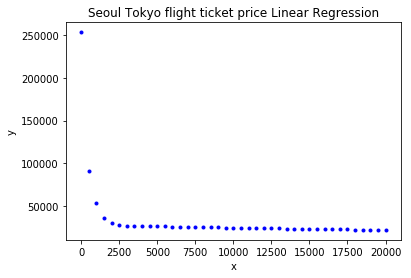

In [19]:
plt.figure(1)
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')


plt.show()

In [20]:
sess.close()